In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('C:/Users/Prince Raj/Desktop/mylogs.csv')
dataset

,IP,DATE,OUTPUT
0,192.168.43.241,06/Jul/2020:03:47:28 +0530,403 3985
1,192.168.43.241,06/Jul/2020:03:47:28 +0530,403 3985
2,192.168.43.241,06/Jul/2020:03:47:28 +0530,403 3985
3,192.168.43.241,06/Jul/2020:03:47:28 +0530,403 3985
4,192.168.43.241,06/Jul/2020:03:47:28 +0530,403 3985
...,...,...,...
124940,192.168.43.241,06/Jul/2020:03:52:11 +0530,403 3985
124941,192.168.43.241,06/Jul/2020:03:53:03 +0530,
124942,192.168.43.241,06/Jul/2020:04:02:37 +0530,GET /index.html HTTP/1.1
124943,192.168.43.241,06/Jul/2020:04:02:37 +0530,GET /favicon.ico HTTP/1.1


In [3]:
dataset.columns

Index(['IP', 'DATE', 'OUTPUT'], dtype='object')

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [5]:
X = dataset.iloc[:,:]
x=X.to_numpy()
x


array([['192.168.43.241', '06/Jul/2020:03:47:28 +0530', ' 403 3985 '],
       ['192.168.43.241', '06/Jul/2020:03:47:28 +0530', ' 403 3985 '],
       ['192.168.43.241', '06/Jul/2020:03:47:28 +0530', ' 403 3985 '],
       ...,
       ['192.168.43.241', '06/Jul/2020:04:02:37 +0530',
        'GET /index.html HTTP/1.1'],
       ['192.168.43.241', '06/Jul/2020:04:02:37 +0530',
        'GET /favicon.ico HTTP/1.1'],
       ['192.168.43.241', '06/Jul/2020:04:03:28 +0530', ' ']],
      dtype=object)

In [6]:
label = LabelEncoder()

In [7]:
IP = label.fit_transform(x[:,0])
Date = label.fit_transform(x[:,1])
Output = label.fit_transform(x[:,2])

In [8]:
ip = pd.DataFrame(IP, columns=["IPAddress"])
date = pd.DataFrame(Date, columns=["DATE"])
User = pd.DataFrame(Output, columns=["Client"])

In [9]:
DATASET = [ip , date , User]
FINAL_DATASET = pd.concat(DATASET , axis=1)
FINAL_DATASET

,IPAddress,DATE,Client
0,3,0,1
1,3,0,1
2,3,0,1
3,3,0,1
4,3,0,1
...,...,...,...
124940,3,278,1
124941,3,279,0
124942,3,280,3
124943,3,280,2


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
SCALED_DATASET = sc.fit_transform(FINAL_DATASET)
SCALED_DATASET

array([[ 7.43920004e-03, -1.60714516e+00, -1.06928085e-03],
       [ 7.43920004e-03, -1.60714516e+00, -1.06928085e-03],
       [ 7.43920004e-03, -1.60714516e+00, -1.06928085e-03],
       ...,
       [ 7.43920004e-03,  3.57000301e+00,  2.67201521e+02],
       [ 7.43920004e-03,  3.57000301e+00,  1.33600226e+02],
       [ 7.43920004e-03,  3.58849283e+00, -1.33602365e+02]])

In [11]:
import seaborn as sns

In [12]:
sns.set()

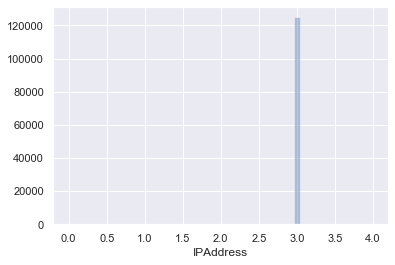

In [13]:
data=FINAL_DATASET['IPAddress']
sns.distplot(data, kde=False)

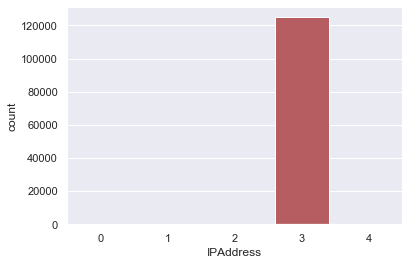

In [14]:
sns.countplot(data=FINAL_DATASET , x="IPAddress")

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=15)
model.fit(SCALED_DATASET)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
pred = model.fit_predict(SCALED_DATASET)

In [17]:
SCALED_DATASET = pd.DataFrame(SCALED_DATASET , columns=['IP', 'DATE','client'])
SCALED_DATASET['cluster'] = pred

In [18]:
ips = [dataset['IP'], FINAL_DATASET['IPAddress']]

In [19]:
final_ip = pd.concat(ips , axis=1)
final_ip

,IP,IPAddress
0,192.168.43.241,3
1,192.168.43.241,3
2,192.168.43.241,3
3,192.168.43.241,3
4,192.168.43.241,3
...,...,...
124940,192.168.43.241,3
124941,192.168.43.241,3
124942,192.168.43.241,3
124943,192.168.43.241,3


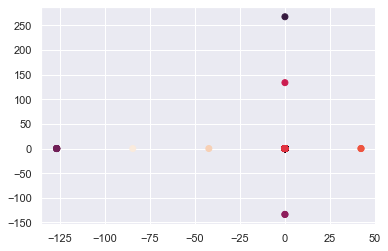

In [20]:
import matplotlib.pyplot as plt
plt.scatter(SCALED_DATASET['IP'], SCALED_DATASET['client'], c=SCALED_DATASET['cluster'])


In [21]:
import pandas as pd
data = pd.read_csv("C:/Users/Prince Raj/Desktop/mylogs.csv")
data

,IP,DATE,OUTPUT
0,192.168.43.241,06/Jul/2020:03:47:28 +0530,403 3985
1,192.168.43.241,06/Jul/2020:03:47:28 +0530,403 3985
2,192.168.43.241,06/Jul/2020:03:47:28 +0530,403 3985
3,192.168.43.241,06/Jul/2020:03:47:28 +0530,403 3985
4,192.168.43.241,06/Jul/2020:03:47:28 +0530,403 3985
...,...,...,...
124940,192.168.43.241,06/Jul/2020:03:52:11 +0530,403 3985
124941,192.168.43.241,06/Jul/2020:03:53:03 +0530,
124942,192.168.43.241,06/Jul/2020:04:02:37 +0530,GET /index.html HTTP/1.1
124943,192.168.43.241,06/Jul/2020:04:02:37 +0530,GET /favicon.ico HTTP/1.1


In [22]:
count=data.groupby("IP").count()
count

,DATE,OUTPUT
IP,,
192.168.43.105,7,7
192.168.43.108,1,1
192.168.43.113,1,1
192.168.43.241,124934,124934
192.168.43.37,2,2


In [23]:
count['OUTPUT']

IP
192.168.43.105         7
192.168.43.108         1
192.168.43.113         1
192.168.43.241    124934
192.168.43.37          2
Name: OUTPUT, dtype: int64

In [24]:
#Now checking the maximum times the server was under attack by single ip
mylist=[]
def myanalysis(count):
    for x in count['OUTPUT']:
        if x not in mylist and x>250:
            mylist.append(x)
            return x
occur=myanalysis(count)